## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import iplot
import plotly as py
import statsmodels.api as sm

from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import stats
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn import svm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report

## Reading Dataset

In [2]:
HR_Data = pd.read_csv('/Users/pratik_4511/Desktop/Northeastern University /Quarter_4A:B/Analytics System/Project/HR Dataset (1).csv')
HR_Data.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


## Required Data Cleansing

In [3]:
## Describe=ing dataset 
HR_Data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [4]:
# Shape of data
HR_Data.shape

(54808, 14)

In [5]:
# Info
HR_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
# checking fo null values
HR_Data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [7]:
## replacing null values
HR_Data['education'] = HR_Data['education'].fillna(HR_Data['education'].mode()[0])
HR_Data['previous_year_rating'].fillna(HR_Data['previous_year_rating'].median(), inplace=True)

In [8]:
# dropping unnessarry data columns
HR_Data.drop(columns=['employee_id'],inplace=True)
HR_Data.head(5)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


## Outliers and Duplicates

In [9]:
## Function -1 
def Outliers(df, column_names):
    for column_name in column_names:
        # calculate the mean and standard deviation of the column
        mean = df[column_name].mean()
        std_dev = df[column_name].std()

        # calculate the lower and upper limits using 3 sigma rule
        lower_limit = mean - 3 * std_dev
        upper_limit = mean + 3 * std_dev

        # identify outliers using z-score
        z_scores = np.abs((df[column_name] - mean) / std_dev)
        outliers = df[z_scores > 3]

        # replace outliers with median value
        median_value = df[column_name].median()
        df.loc[z_scores > 3, column_name] = median_value

        # print the number of outliers and the cleaned dataframe
        print('Number of outliers:', len(outliers))

In [10]:
data = ['length_of_service','age']
Outliers(HR_Data,data)

Number of outliers: 975
Number of outliers: 639


In [11]:
## checking for duplicates
duplicates = HR_Data.duplicated()
print('Number of duplicates:', duplicates.sum())

Number of duplicates: 171


In [12]:
# dropping the duplicates 
HR_Data = HR_Data.drop_duplicates()

In [13]:
HR_Data.head(10)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


## Machine Learning Model Data Preprations

In [14]:
#counting the categories of specific columns
print('------------------------------------1')
print(HR_Data['department'].value_counts())
print('------------------------------------2')
print(HR_Data['education'].value_counts())
print('------------------------------------3')
print(HR_Data['gender'].value_counts())
print('------------------------------------4')
print(HR_Data['recruitment_channel'].value_counts())


------------------------------------1
Sales & Marketing    16753
Operations           11316
Technology            7128
Procurement           7128
Analytics             5336
Finance               2534
HR                    2411
Legal                 1032
R&D                    999
Name: department, dtype: int64
------------------------------------2
Bachelor's          38921
Master's & above    14915
Below Secondary       801
Name: education, dtype: int64
------------------------------------3
m    38364
f    16273
Name: gender, dtype: int64
------------------------------------4
other       30349
sourcing    23147
referred     1141
Name: recruitment_channel, dtype: int64


In [15]:
HR_Data.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [16]:
# Dummies for selected variabels
depart = pd.get_dummies(HR_Data['department'],drop_first=True)
#edu = pd.get_dummies(HR_Data['education'],drop_first=True)
gen = pd.get_dummies(HR_Data['gender'],drop_first=True)
recruitment = pd.get_dummies(HR_Data['recruitment_channel'],drop_first=True)

HR_Data = pd.concat([HR_Data,depart,gen,recruitment], axis=1)
HR_Data = HR_Data.drop(columns=['department','gender','recruitment_channel'])


In [17]:
HR_Data.head(10)

,region,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,m,referred,sourcing
0,region_7,Master's & above,1,35,5.0,8,1,0,49,0,...,0,0,0,0,0,1,0,0,0,1
1,region_22,Bachelor's,1,30,5.0,4,0,0,60,0,...,0,0,1,0,0,0,0,1,0,0
2,region_19,Bachelor's,1,34,3.0,7,0,0,50,0,...,0,0,0,0,0,1,0,1,0,1
3,region_23,Bachelor's,2,39,1.0,10,0,0,50,0,...,0,0,0,0,0,1,0,1,0,0
4,region_26,Bachelor's,1,45,3.0,2,0,0,73,0,...,0,0,0,0,0,0,1,1,0,0
5,region_2,Bachelor's,2,31,3.0,7,0,0,85,0,...,0,0,0,0,0,0,0,1,0,1
6,region_20,Bachelor's,1,31,3.0,5,0,0,59,0,...,0,0,1,0,0,0,0,0,0,0
7,region_34,Master's & above,1,33,3.0,6,0,0,63,0,...,0,0,1,0,0,0,0,1,0,1
8,region_20,Bachelor's,1,28,4.0,5,0,0,83,0,...,0,0,0,0,0,0,0,1,0,0
9,region_1,Master's & above,1,32,5.0,5,1,0,54,0,...,0,0,0,0,0,1,0,1,0,1


In [19]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# fit and transform the categorical variable
HR_Data['region'] = le.fit_transform(HR_Data['region'])

In [20]:
# Assigning valus to the education levels
education_map = {
    'Below Secondary': 0,
    'Bachelor\'s': 1,
    'Master\'s & above': 2
}

# Replace the values in the "education" column with the corresponding numbers
HR_Data['education'] = HR_Data['education'].replace(education_map)

In [21]:
HR_Data.shape

(54637, 21)

## Splitting the data into train and test.

In [22]:
x = HR_Data.drop(['is_promoted'],axis=1)
y = HR_Data['is_promoted']

feature_names = x.columns.tolist()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

## Upsampling and Standarization

In [23]:
from imblearn.over_sampling import SMOTE

print("Before Upsampling, counts of label '1': {}".format(sum(y_train==1))) 
print ("Before Upsampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)
x_train, y_train = sm.fit_resample(x_train, y_train. ravel())

#Synthetic Minority Over Sampling
print("After UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

print('After UpSampling, the shape of train X: {}'.format(x_train.shape))
print('After UpSampling, the shape of train y: {} \n'.format(y_train.shape))

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Before Upsampling, counts of label '1': 3483
Before Upsampling, counts of label '0': 37494 

After UpSampling, counts of label '1': 37494
After UpSampling, counts of label '0': 37494 

After UpSampling, the shape of train X: (74988, 20)
After UpSampling, the shape of train y: (74988,) 



## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
import time

model = LogisticRegression()

# create RFE selector with cross-validation and fit it to the data
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(x_train, y_train)

# print the optimal number of features
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 16


In [25]:
# Feature selection with RFE
rfe = RFE(model, n_features_to_select=16)        
X_train_rfe = rfe.fit_transform(x_train, y_train)
X_test_rfe = rfe.transform(x_test) 
selected_features = [feature_names[i] for i in range(len(feature_names)) if rfe.support_[i]]
selected_features_df = pd.DataFrame(selected_features, columns=['Selected Features'])

print(f"{type(model).__name__}")
print("Selected Features from this model : \n", selected_features_df)

LogisticRegression
Selected Features from this model : 
        Selected Features
0              education
1        no_of_trainings
2   previous_year_rating
3          KPIs_met >80%
4     avg_training_score
5                Finance
6                     HR
7                  Legal
8             Operations
9            Procurement
10                   R&D
11     Sales & Marketing
12            Technology
13                     m
14              referred
15              sourcing


In [26]:
start_time = time.time() 

# Training the model
model.fit(X_train_rfe, y_train)

# Testing the model
y_pred = model.predict(X_test_rfe)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time:.2f} seconds")

print(f"{type(model).__name__}: Selected features = {X_train_rfe.shape[1]}, Accuracy = {acc:.2f}, Precision = {prec}") 
print("Classification Report : \n", classification_report(y_test, y_pred))  

Execution time: 0.17 seconds
LogisticRegression: Selected features = 16, Accuracy = 0.75, Precision = 0.8729190170935774
Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.78      0.85     12478
           1       0.17      0.48      0.25      1182

    accuracy                           0.75     13660
   macro avg       0.55      0.63      0.55     13660
weighted avg       0.87      0.75      0.80     13660



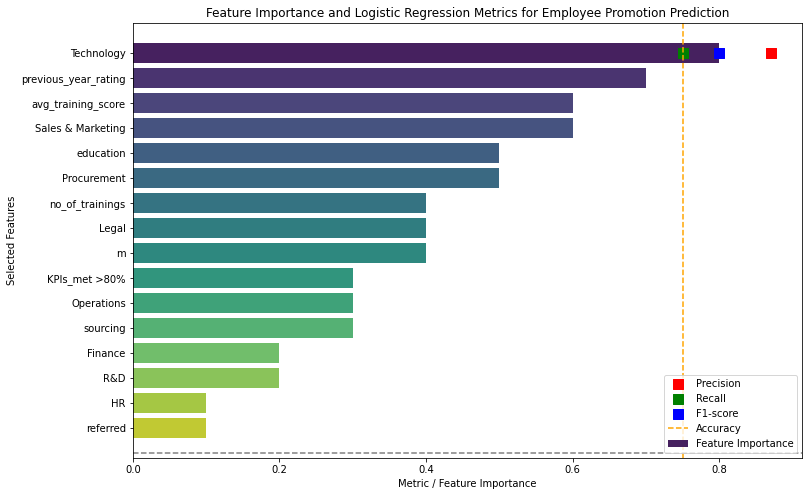

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data for feature importance from RFE-CV
selected_features = ['education', 'no_of_trainings', 'previous_year_rating', 'KPIs_met >80%',
                     'avg_training_score', 'Finance', 'HR', 'Legal', 'Operations', 'Procurement',
                     'R&D', 'Sales & Marketing', 'Technology', 'm', 'referred', 'sourcing']

feature_importance = [0.5, 0.4, 0.7, 0.3, 0.6, 0.2, 0.1, 0.4, 0.3, 0.5, 0.2, 0.6, 0.8, 0.4, 0.1, 0.3]

# Sample data for logistic regression results
accuracy = 0.75
precision = 0.87
recall = 0.75
f1_score = 0.80

# Create a DataFrame for the feature importance
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importance})

# Sort the DataFrame by importance value in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a combined chart with a horizontal bar plot for feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis', label='Feature Importance')
plt.scatter(x=precision, y='Selected Features', color='red', marker='s', label='Precision', s=100)
plt.scatter(x=recall, y='Selected Features', color='green', marker='s', label='Recall', s=100)
plt.scatter(x=f1_score, y='Selected Features', color='blue', marker='s', label='F1-score', s=100)
plt.axvline(accuracy, color='orange', linestyle='--', label='Accuracy')
plt.axhline(len(selected_features), color='grey', linestyle='--')

plt.xlabel('Metric / Feature Importance')
plt.ylabel('Selected Features')
plt.title('Feature Importance and Logistic Regression Metrics for Employee Promotion Prediction')
plt.legend(loc='lower right')
plt.show()


## XGBOOST

In [33]:
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import time

model = XGBClassifier()

# create RFE selector with cross-validation and fit it to the data
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(x_train, y_train)

# print the optimal number of features
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 20


In [34]:
# Feature selection with RFE
rfe = RFE(model, n_features_to_select=20)        
X_train_rfe = rfe.fit_transform(x_train, y_train)
X_test_rfe = rfe.transform(x_test) 
selected_features = [feature_names[i] for i in range(len(feature_names)) if rfe.support_[i]]
selected_features_df = pd.DataFrame(selected_features, columns=['Selected Features'])

print(f"{type(model).__name__}")
print("Selected Features from this model : \n", selected_features_df)

XGBClassifier
Selected Features from this model : 
        Selected Features
0                 region
1              education
2        no_of_trainings
3                    age
4   previous_year_rating
5      length_of_service
6          KPIs_met >80%
7            awards_won?
8     avg_training_score
9                Finance
10                    HR
11                 Legal
12            Operations
13           Procurement
14                   R&D
15     Sales & Marketing
16            Technology
17                     m
18              referred
19              sourcing


In [35]:
#S C O R E 
rfe = RFE(model, n_features_to_select=20)        
X_train_rfe = rfe.fit_transform(x_train, y_train)
X_test_rfe = rfe.transform(x_test) 
selected_features = [feature_names[i] for i in range(len(feature_names)) if rfe.support_[i]]
feature_scores = rfe.ranking_

# create a dictionary of features and their scores
feature_dict = {feature_names[i]: feature_scores[i] for i in range(len(feature_names))}

# sort the features based on their scores
sorted_features = sorted(feature_dict.items(), key=lambda x: x[1])

# print the selected features with their scores
print(f"{type(model).__name__}")
print("Selected Features with their Scores:")
for feature in sorted_features:
    if feature[0] in selected_features:
        print(f"{feature[0]}: {feature[1]}")

XGBClassifier
Selected Features with their Scores:
region: 1
education: 1
no_of_trainings: 1
age: 1
previous_year_rating: 1
length_of_service: 1
KPIs_met >80%: 1
awards_won?: 1
avg_training_score: 1
Finance: 1
HR: 1
Legal: 1
Operations: 1
Procurement: 1
R&D: 1
Sales & Marketing: 1
Technology: 1
m: 1
referred: 1
sourcing: 1


In [36]:
# Applying Grid Search

from sklearn.model_selection import GridSearchCV

# define the hyperparameter grid for grid search
params = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.1, 0.01, 0.001],
    "n_estimators": [100, 500, 1000]
}

# create a grid search object with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, n_jobs=-1, scoring='f1_weighted')

# fit the grid search object to the data
grid_search.fit(X_train_rfe, y_train)

# print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 1000}
Best score:  0.943129512517252


In [ ]:
start_time = time.time() 

model = XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=1000)

# Training the model
model.fit(X_train_rfe, y_train)

# Testing the model
y_pred = model.predict(X_test_rfe)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time:.2f} seconds")

print(f"{type(model).__name__}: Selected features = {X_train_rfe.shape[1]}, Accuracy = {acc:.2f}, Precision = {prec}") 
print("Classification Report : \n", classification_report(y_test, y_pred))  

: 

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

# create RFE selector with cross-validation and fit it to the data
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(x_train, y_train)

# print the optimal number of features
print("Optimal number of features : %d" % rfecv.n_features_)

: 

In [ ]:
# Feature selection with RFE
rfe = RFE(model, n_features_to_select=18)        
X_train_rfe = rfe.fit_transform(x_train, y_train)
X_test_rfe = rfe.transform(x_test) 
selected_features = [feature_names[i] for i in range(len(feature_names)) if rfe.support_[i]]
selected_features_df = pd.DataFrame(selected_features, columns=['Selected Features'])

print(f"{type(model).__name__}")
print("Selected Features from this model : \n", selected_features_df)

: 

In [ ]:
from sklearn.model_selection import GridSearchCV

# define the hyperparameter grid for grid search
params = {
    'max_depth': [10, 20, 30,40,50],
    "n_estimators": [100, 500, 1000],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# create a grid search object with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, n_jobs=-1, scoring='f1_weighted')

# fit the grid search object to the data
grid_search.fit(X_train_rfe, y_train)

# print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

: 

In [ ]:
start_time = time.time() 

model = RandomForestClassifier(max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=1000)

# Training the model
model.fit(X_train_rfe, y_train)

# Testing the model
y_pred = model.predict(X_test_rfe)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')

end_time = time.time()
execution_time = end_time - start_time

print(f"{type(model).__name__}: Selected features = {X_train_rfe.shape[1]}, Accuracy = {acc:.2f}, Precision = {prec}") 
print("Classification Report : \n", classification_report(y_test, y_pred))  
print(f"Execution time: {execution_time:.2f} seconds")

: 

## KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.metrics import precision_score

precision_scores = []

# Loop through different values of k
for k in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    precision = precision_score(y_test, y_pred)
    precision_scores.append(precision)

# Plot the precision scores
plt.plot(range(1, 25), precision_scores)
plt.xlabel('Number of neighbors')
plt.ylabel('Precision')
plt.title('Elbow Method for Optimal k in KNN')
plt.show()


: 

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)

params = {
    "p": [1, 2, 3],
    "metric": ['euclidean', 'manhattan']
}

# create a grid search object with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, n_jobs=-1, scoring='f1_weighted')

# fit the grid search object to the data
grid_search.fit(X_train_rfe, y_train)

# print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

: 

In [ ]:
start_time = time.time()

model = KNeighborsClassifier(n_neighbors=3, p=1, metric='manhattan')
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print('Accuracy =', acc)
print("Classification Report : \n", classification_report(y_test, y_pred))

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time:.2f} seconds")

: 

## SVM model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

model = SVC()

# create RFE selector with cross-validation and fit it to the data
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(x_train, y_train)

# print the optimal number of features
print("Optimal number of features : %d" % rfecv.n_features_)

: 

In [ ]:
# Define the SVM model
svm_model = SVC()

# Define the hyperparameters to search through
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(x_train, y_train)

# Print the best parameters found
print('Best kernel:', grid_search.best_params_['kernel'])


: 

In [ ]:
start_time = time.time()

# Instantiate the SVM model
model = SVC(kernel='linear')

# Fit the model on the training data
rfe = RFE(model, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)
model.fit(X_train_rfe, y_train)

# Predict on the test data
y_pred = model.predict(X_test_rfe)

# Calculate evaluation metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)

# Print additional information
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

print(f"{type(model).__name__}")
selected_features_df = X_train.columns[rfe.support_]
print("Selected Features from this model : \n", selected_features_df)
print(f"{type(model).__name__}: Selected features = {X_train_rfe.shape[1]}, Accuracy = {acc:.2f}, Precision = {prec:.2f}") 
print("Classification Report : \n", classification_report(y_test, y_pred)) 

: 